<a href="https://colab.research.google.com/github/Phuongthao2k/CS114.K21.KHTN/blob/master/Cat_and_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SINH VIÊN : TRẦN THỊ PHƯƠNG THẢO**

**ID : 18521422**

**CLASS: CS114.K21.KHTN**

**UIT-VNU**

#**Mô tả đồ án**
Tên đồ án: Phân biệt chó mèo

Input: Hình ảnh có chứa chó hoặc mèo

Output: Cho biết đó là chó hay là mèo

#**Mô tả dữ liệu**
Cách dây dựng bộ dữ liệu: Dataset tự thu thập bằng cách đi các quán cà phê, trà sữa thú cưng/chó/mèo tại Sài Gọn để chụp ảnh. Xin chụp ảnh của những con chó, con mèo thấy trên đường.

Dataset có 2600 bức ảnh chia thành 2 labels: 1300 ảnh chứa con chó và 1300 ảnh chứa con mèo

# Kết nối sử dụng dữ liệu trên drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/My Drive/ML/cat_dog'


/content/drive/My Drive/ML/cat_dog


# Import các thư viện cần thiết

In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.image as img
import itertools 
import pandas as pd 
 
%matplotlib inline

#Xử lý dữ liệu






### Sử dụng opencv để đọc ảnh

### Hàm preprocess giúp đọc dữ liệu từ link dataset resize ảnh về kích thước 128x128 

In [7]:
def preprocess(path: str, output_path):
  for image_path in os.listdir(path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128), cv2.INTER_CUBIC)
    cv2.imwrite(os.path.join(output_path, image_path), image)

### Tạo dataset mới với ảnh đã được thay đổi kích thước

In [5]:
os.mkdir("resized_cat_dog")
path = "/content/drive/My Drive/ML"
output_path = "resized_cat_dog"
preprocess(path, output_path)

FileExistsError: ignored

###Xác định một số biến toàn cục

In [9]:
ROWS = 128
COLUMNS = 128
CHANNELS = 3

###Tải dữ liệu và thêm labels

In [10]:
def load_dataset(path):
  dataset = []
  labels = []
  
  for image_path in os.listdir(path):
    image = cv2.imread(os.path.join(path,image_path))
    dataset.append(image)
    label = image_path[:3]
    labels.append(label)

  return dataset, labels

In [11]:
dataset_PATH = '/content/drive/My Drive/ML/resized_cat_dog'


In [12]:
dataset, labels = load_dataset(dataset_PATH)

In [13]:
# Kích thước của dataset/labels
print(len(dataset))
print(len(labels))

2600
2600


In [14]:
# Kích thước ảnh
print(dataset[1].shape)

(128, 128, 3)


In [15]:
# In 1 ảnh dưới dạng mảng 3 chiều và label tương ứng của nó
print(dataset[5])
print(labels[5])

[[[ 25  27  27]
  [ 24  24  24]
  [ 43  35  35]
  ...
  [ 67  86 119]
  [ 58  74 110]
  [ 62  78 115]]

 [[ 29  31  32]
  [ 20  20  20]
  [ 36  30  31]
  ...
  [ 68  87 120]
  [ 70  86 122]
  [ 67  83 120]]

 [[ 16  19  23]
  [ 23  22  24]
  [ 30  24  25]
  ...
  [ 76  93 126]
  [ 71  87 123]
  [ 74  90 126]]

 ...

 [[ 66  61 130]
  [ 69  62 135]
  [ 20  11  92]
  ...
  [113 117 112]
  [109 113 108]
  [103 107 102]]

 [[ 81  72 152]
  [ 40  32 109]
  [ 49  44 113]
  ...
  [113 117 112]
  [108 114 109]
  [106 112 107]]

 [[ 39  28 114]
  [ 25  17  94]
  [ 32  28  93]
  ...
  [112 116 111]
  [107 113 108]
  [105 111 106]]]
Cat


### Chia dataset (80% train 20% test)

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset, labels, test_size=0.20, stratify=labels)

# Trích xuất đặc trưng

### Sử dụng Hog để rút trích đặc trưng
### Chúng ta có 225 khối (15x15) cho mỗi ảnh có kích thước 128x128, mỗi khối được mã hóa thành vecto 36x1 là các đối tượng địa lý. Do đó, mỗi ảnh sẽ được mã hóa thành 1 vecto 8100 (255 x 36 × 1) đặc trưng.

In [17]:
from skimage.feature import hog
def feature_extraction(image):
    feature = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True)
    feature = feature.ravel()
    return feature

In [18]:
def get_feature(images):
    features = []
    for image in images:
        feature = feature_extraction(image)
        features.append(feature)
    return features

In [19]:
X = get_feature(dataset)

### Mã hóa label 0-cat : 1-dog  

In [20]:
y = []
i = 0
for label in labels:
  if 'dog' in label.lower() :
    y.append(1)
  elif 'cat' in label.lower() :
    y.append(0)
  i += 1

In [21]:
X = np.asarray(X)
y = np.asarray(y)

In 1 ảnh và label tương ứng dướ dạng số đã được chuyển đổi trong tập dữ liệu

In [22]:
print(X[5])
print(len(X[5]))
print(y[5])

[0.255455   0.21537984 0.         ... 0.17325303 0.17428344 0.12048328]
8100
0


Xem kích thước của dữ liệu đã chuyển đổi

In [23]:
print("X Train shape: {}".format(X.shape))
print("y Train shape: {}".format(y.shape))

X Train shape: (2600, 8100)
y Train shape: (2600,)


###  Xác định các lớp cho mèo là 0 và chó là 1

In [24]:
classes = {0: 'cats',
          1: 'dogs'}

### Phân chia dữ liệu train model

In [74]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.20, stratify=labels)

###Xem một số ảnh từ dữ liệu đào tạo

In [75]:
def show_images(X, y, idx) :
  image = X[idx]
  image = image.reshape((ROWS, COLUMNS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx]]))
  plt.show()

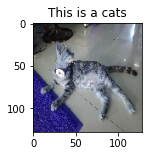

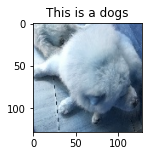

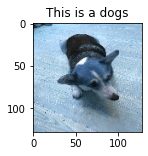

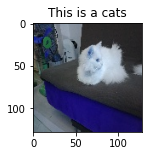

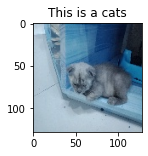

In [27]:
for i in np.random.randint(0, len(trainX), 5) :
  show_images(dataset, y, i)

# Triển khai mô hình đào tạo

### 1. Lựa chọn model 
### 2. Tạo một phiên bản của Mô hình
### 3. Đào tạo model
### 4. Kiểm tra độ chính xác của model

## Sử dụng 1 trong các model sau: LogisticRegression, LinearDiscriminantAnalysis, KNeighborsClassifie, RandomForestClassifier, SVC.

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [76]:
X_train_lr, y_train_lr = trainX, trainY

# **LogisticRegression**

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [77]:
lr.fit(X_train_lr, y_train_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
lr_pred = lr.predict(testX)
lr_score = accuracy_score(testY, lr_pred)
lr_report = classification_report(testY, lr_pred)
print("LogisticRegression")
print('Score = ', lr_score)
print(lr_report)

LogisticRegression
Score =  0.8115384615384615
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       260
           1       0.82      0.79      0.81       260

    accuracy                           0.81       520
   macro avg       0.81      0.81      0.81       520
weighted avg       0.81      0.81      0.81       520



# **LinearDiscriminantAnalysis**

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [35]:
lda = LinearDiscriminantAnalysis()

In [82]:
lda.fit(X_train_lr, y_train_lr)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [83]:
lda_pred = lda.predict(testX)
lda_score = accuracy_score(testY, lda_pred)
lda_report = classification_report(testY, lda_pred)
print("LinearDiscriminantAnalysis")
print('Score = ', lda_score)
print(lda_report)

LinearDiscriminantAnalysis
Score =  0.7634615384615384
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       260
           1       0.75      0.78      0.77       260

    accuracy                           0.76       520
   macro avg       0.76      0.76      0.76       520
weighted avg       0.76      0.76      0.76       520



# **KNeighborsClassifier**

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier()


In [84]:
knn.fit(X_train_lr, y_train_lr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [85]:
knn_pred = knn.predict(testX)
knn_score = accuracy_score(testY, knn_pred)
knn_report = classification_report(testY, knn_pred)
print('KNeighborsClassifier')
print('Score = ', knn_score)
print(knn_report)

KNeighborsClassifier
Score =  0.7942307692307692
              precision    recall  f1-score   support

           0       0.93      0.63      0.76       260
           1       0.72      0.95      0.82       260

    accuracy                           0.79       520
   macro avg       0.83      0.79      0.79       520
weighted avg       0.83      0.79      0.79       520



# **RandomForestClassifier**

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier()


In [86]:
rf.fit(X_train_lr, y_train_lr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
rf_pred = rf.predict(testX)
rf_score = accuracy_score(testY, rf_pred)
rf_report = classification_report(testY, rf_pred)
print('RandomForestClassifier')
print('Score = ', rf_score)
print(rf_report)

RandomForestClassifier
Score =  0.8038461538461539
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       260
           1       0.84      0.75      0.79       260

    accuracy                           0.80       520
   macro avg       0.81      0.80      0.80       520
weighted avg       0.81      0.80      0.80       520



# **SVC**

In [46]:
from sklearn.svm import SVC

In [47]:
svm = SVC()
X_train_lr, y_train_lr = trainX, trainY

In [79]:
svm.fit(X_train_lr, y_train_lr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [80]:
svm_pred = svm.predict(testX)
svm_score = accuracy_score(testY, svm_pred)
svm_report = classification_report(testY, svm_pred)
print('SVC')
print('Score = ', svm_score)
print(svm_report)

SVC
Score =  0.8711538461538462
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       260
           1       0.87      0.88      0.87       260

    accuracy                           0.87       520
   macro avg       0.87      0.87      0.87       520
weighted avg       0.87      0.87      0.87       520



### Đào tạo model và kiểm tra kết quả xác thực chéo

In [50]:
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.externals import joblib

warnings.filterwarnings('ignore')

scoring    = "accuracy"
seed = 42
num_trees = 100

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [51]:
# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('SVM', SVC(random_state=seed)))

LR: 0.801923 (0.011438)
LDA: 0.761058 (0.011131)
KNN: 0.740865 (0.014294)
RF: 0.794231 (0.008681)
SVM: 0.849519 (0.011026)


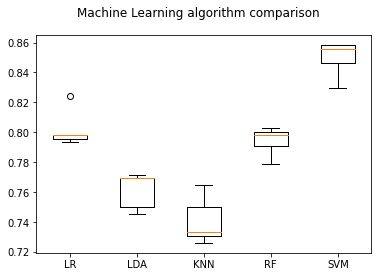

In [52]:
# 10-fold cross validation
names =  []
results = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=seed)
    cv_results = cross_val_score(model, trainX, trainY, cv=kfold, scoring="accuracy" )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Đánh giá model sử dụng dữ liệu ngoài dataset

### Sử dụng dữ liệu trên google tạo tập dữ liệu kiểm thử
### (200 ảnh chia đều 100 "dog" 100 "cat")

In [ ]:
%cd '/content/drive/My Drive/ML/test_cat_dog'

In [ ]:
os.mkdir("resized_test_cat_dog")


In [ ]:
path = "/content/drive/My Drive/ML/test_cat_dog"
output_path = "resized_test_cat_dog"
preprocess(path, output_path)

In [54]:
dataset_test_PATH = '/content/drive/My Drive/ML/test_cat_dog/resized_test_cat_dog'

In [61]:
dataset_test, labels_test = load_dataset(dataset_test_PATH)

In [93]:
X_test = get_feature(dataset_test)

In [94]:
y_test = []
i = 0
for label in labels_test:
  if 'dog' in label.lower() :
    y_test.append(1)
  elif 'cat' in label.lower() :
    y_test.append(0)
  i += 1

In [95]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [96]:
print(len(X_test))
print(len(y_test))

200
200


In [97]:
name = ['lr', 'lda', 'knn', 'rf', 'svm']
i = 0
for model in [lr, lda, knn, rf, svm]:
  print(name[i], "- Model accuracy: {:.2f}%".format(model.score(X_test,y_test)*100))
  i += 1

lr - Model accuracy: 62.50%
lda - Model accuracy: 56.00%
knn - Model accuracy: 47.50%
rf - Model accuracy: 60.00%
svm - Model accuracy: 62.50%


In [103]:
name = ['lr', 'lda', 'knn', 'rf', 'svm']
i = 0
for model in [lr, lda, knn, rf, svm]:
  print(name[i], "- Model accuracy: {:.2f}%".format(model.score(testX, testY)*100))
  i += 1

lr - Model accuracy: 81.15%
lda - Model accuracy: 76.35%
knn - Model accuracy: 79.42%
rf - Model accuracy: 80.38%
svm - Model accuracy: 87.12%


# Đánh giá model
- Việc đánh giá model sử dụng tập test trong dataset (dữ liệu cá nhân) cho kết quả tốt hơn việc sử dụng dữ liệu bên ngoài để đánh giá. Do dataset tự chụp, tập test và train chia từ dataset nên ảnh 2 bên có nhiều điểm tương đồng.
- svm là model cho độ chính xác tốt nhất ở cả tập test từ dataset (87.1%) và tập test từ dữ liệu google (62.5%). Cả kết quả từ việc đánh giá model bằng xác thực chéo (87.1%). 


# Thử nghiệm dự đoán với model được chọn
## svm là model tốt nhất được lựa chọn cho việc phân biệt "chó" và "mèo"
## (Sử dụng dữ liệu test của dataset xem 1 số dự đoán của model)

In [98]:
def show_image_prediction(X, idx, model) :
  image = X[idx]
  feature_image = testX[idx].reshape(1,-1)
  image_class = classes[model.predict(feature_image).item()]
  image = image.reshape((ROWS, COLUMNS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is {}".format(idx, image_class))
  plt.show()


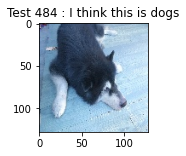

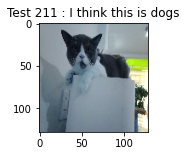

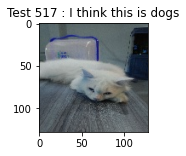

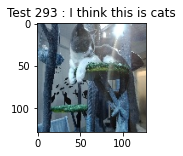

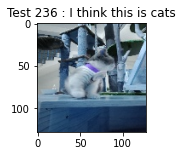

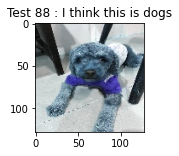

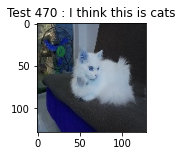

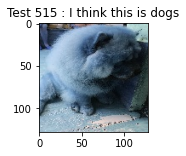

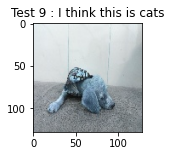

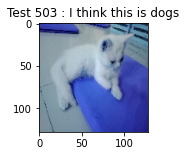

In [102]:
for i in np.random.randint(0, len(X_test), 10) :
#i = np.random.randint(0, len(X_train))
  show_image_prediction(X_test, i, svm)